In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint
np.set_printoptions(precision = 2)

In [14]:
#Con factorizacion QR
#construimos a la matriz A:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
A=np.ones((mpoints,2))
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

In [15]:
A[:,1]=x

In [16]:
A

array([[ 1.  , -0.26],
       [ 1.  ,  0.09],
       [ 1.  ,  0.43],
       [ 1.  ,  0.9 ],
       [ 1.  ,  0.56],
       [ 1.  ,  0.44],
       [ 1.  ,  0.38],
       [ 1.  , -0.15],
       [ 1.  ,  0.78],
       [ 1.  , -0.02],
       [ 1.  ,  1.61],
       [ 1.  , -0.37],
       [ 1.  ,  0.36],
       [ 1.  ,  0.17],
       [ 1.  ,  2.52],
       [ 1.  ,  0.14],
       [ 1.  ,  1.16],
       [ 1.  ,  0.59],
       [ 1.  , -1.2 ],
       [ 1.  , -0.37]])

In [17]:
Q,R = np.linalg.qr(A)

In [18]:
#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta)

array([ 2.03, -2.65])


$$p_{1}(x) = -2.65x + 2.03$$

In [19]:
y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:y_ajustadas_QR = beta[0] + beta[1]*x

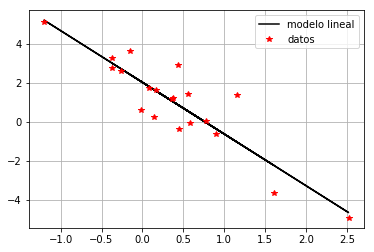

In [20]:
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.grid(True)

# Modelo sin intercepto

Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

Obs: En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.

Ejemplo numérico en numpy:
Ejercicio: realizar el ajuste correspondiente para este caso con QR.

In [15]:
np.random.seed(1989) #Semilla para que salgan los mismos números
mpoints =20
x = np.random.randn(mpoints) 
y = -3*x+np.random.normal(2,1,mpoints)

In [16]:
#construimos a la matriz A:
mpoints
A=np.ones((mpoints,1))

In [17]:
A[:,0] = x
A

array([[-0.26],
       [ 0.09],
       [ 0.43],
       [ 0.9 ],
       [ 0.56],
       [ 0.44],
       [ 0.38],
       [-0.15],
       [ 0.78],
       [-0.02],
       [ 1.61],
       [-0.37],
       [ 0.36],
       [ 0.17],
       [ 2.52],
       [ 0.14],
       [ 1.16],
       [ 0.59],
       [-1.2 ],
       [-0.37]])

In [18]:
#Resolvemos el sistema
Q,R = np.linalg.qr(A)

In [19]:
#Resolvemos el sistema R*beta = Q^T*y
beta_1= np.linalg.solve(R,Q.T@y)
pprint.pprint(beta_1)

array([-1.6])


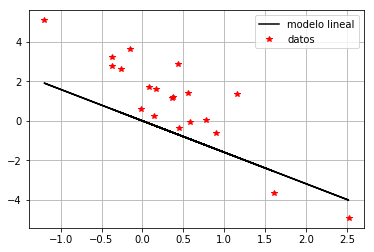

In [25]:
y_ajustadas_QR = A@beta_1
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.grid(True)

Una vez hecho el ajuste...
Se realiza un análisis de residuales, se hace una gráfica el modelo si las dimensiones en las que se está trabajando lo permiten y se calcula el error cuadrático medio.

Si $\hat{y}_i$ es el valor ajustado para el dato $x_i$, esto es: $\hat{y}_i = f(x_i|\hat{\beta}) = \displaystyle \sum_{i=0}^m \left (y_i -\displaystyle \sum_{j=0}^n\hat{\beta}_j\phi_j(x_i)\right )^2$ el residual $i$ es: $r_i = y_i - \hat{y}_i$ y representa la discrepancia entre los datos y el modelo.

El error cuadrático medio se calcula como: $$ECM(\hat{y}) = \frac{1}{m} \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

Ejercicio: calcular el ECM de los ajustes anteriores.

In [31]:
#Definimos la función de errores
def ercm(y,y_gorro):
    return sum((y-y_gorro)**2)

In [32]:
y_gorro=A@beta
ECM=ercm(y,y_gorro)
print("ECM:",ercm(y,y_gorro))

ECM: 20.435476838775884


In [43]:
#Residuales
print("residuales:",y_gorro)

residuales: [ 2.73  1.8   0.89 -0.35  0.55  0.86  1.03  2.43 -0.03  2.09 -2.23  3.
  1.09  1.58 -4.65  1.66 -1.05  0.47  5.22  3.02]


Text(0.5, 1.0, 'Residuales')

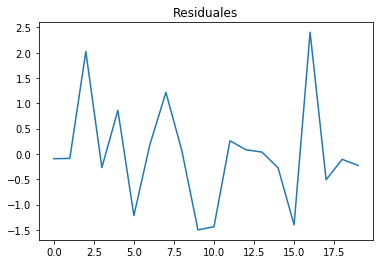

In [49]:
plt.plot(y-y_gorro)
plt.title('Residuales')

Ejemplo: ajuste de un modelo por mínimos cuadrados lineales con funciones $\phi_j$'s no lineales
Obsérvese que el modelo que se ha utilizado: $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ permite elegir las $\phi_j$'s como funciones de $\mathbb{R}$ a $\mathbb{R}$. Por lo que tenemos una amplia gama de posibilidades de ajuste de curvas a datos.

Como ejemplo utilizaremos el conjunto de datos "datos_para_ipynb_3_minimos_cuadrados.txt" el cual lo pueden descargar en el mismo directorio de este ipynb o bien dando click aquí y ajustaremos tres modelos de la forma:
$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$
$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$
$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [53]:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)

Text(0.5, 1.0, 'datos')

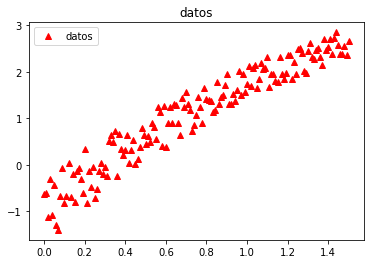

In [68]:
x = datos[:,0]
y = datos[:,1]
plt.plot(x, y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')

## Modelo 1

$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$

In [136]:
#Modelo1
mod1=lambda var: var/(var+1) 
mpoints,=x.shape
A=np.ones((mpoints,2))
A[:,1]=mod1(x)
Q,R=np.linalg.qr(A)
betas= np.linalg.solve(R,Q.T@y)
print('betas')
pprint.pprint(betas)

betas
array([-1.3,  6.2])


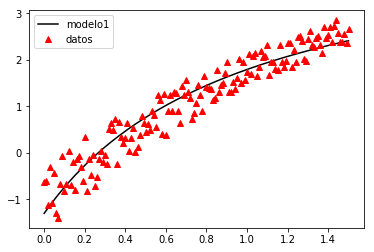

In [137]:
y_gorro1_QR=A@betas
plt.plot(x, y_gorro1_QR , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')

## Modelo 2

$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$

In [79]:
#Modelo 2
ngrado=2
coeficientes=np.polyfit(x,y,ngrado)
pprint.pprint(coeficientes) #Betas

array([-0.69,  3.39, -0.92])


In [97]:
y_gorro2_numpy =coeficientes[2]+coeficientes[1]*x+coeficientes[0]*x**2

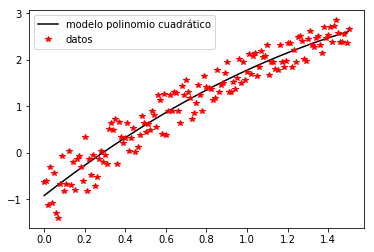

In [98]:
plt.plot(x,y_gorro2_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo polinomio cuadrático','datos'], loc='best')

## Modelo 3

Ejercicio: ajustar el modelo 3. Calcular ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?

$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

In [129]:
#Modelo3
mod3=lambda var: np.log(var+1) 
mpoints,=x.shape
A3=np.ones((mpoints,2))
A3[:,1]=mod3(x)
Q,R=np.linalg.qr(A3)
betas_3= np.linalg.solve(R,Q.T@y)
print('betas')
pprint.pprint(betas_3)

betas
array([-0.98,  3.96])


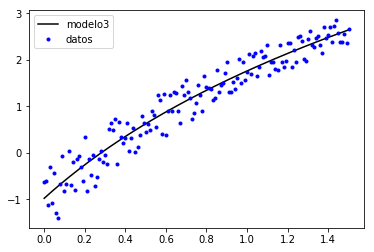

In [130]:
y_gorro3_QR=A3@betas_3
plt.plot(x,y_gorro3_QR,'k-',x,y,'b.')
plt.legend(['modelo3','datos'], loc='best')

In [138]:
#Errores cuadraticos medios
def ECM1(y,y_gorro1_QR):
    return sum((y-y_gorro1_QR)**2)
def ECM2(y,y_gorro2_numpy):
    return sum((y-y_gorro2_numpy)**2)
def ECM3(y,y_gorro3_QR):
    return sum((y-y_gorro3_QR)**2)
print("ECM1:",ECM1(y,y_gorro1_QR))
print("ECM2:",ECM2(y,y_gorro2_numpy))
print("ECM3:",ECM1(y,y_gorro3_QR))

ECM1: 14.65607144034016
ECM2: 11.974386376666102
ECM3: 12.041297818937322


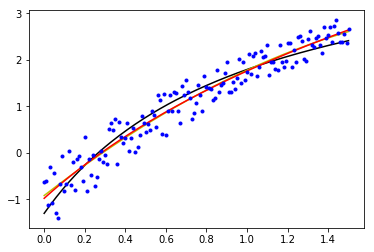

In [152]:
#Grafica de los 3 modelos
plt.plot(x, y_gorro1_QR , 'k-')
plt.plot(x,y_gorro2_numpy, 'y-')
plt.plot(x,y_gorro3_QR,'r-',x,y,'b.')